In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

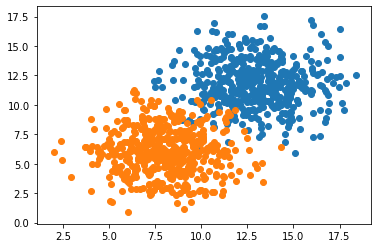

In [47]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13,2,n_pts),
               np.random.normal(12,2,n_pts)]).T
Xb = np.array([np.random.normal(8,2,n_pts),
               np.random.normal(6,2,n_pts)]).T
X = np.vstack((Xa,Xb))
y = np.matrix([np.append(np.zeros(n_pts),np.ones(n_pts))]).T
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])


In [48]:
model = Sequential()
model.add(Dense(units=1,input_shape=(2,),activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam,loss='binary_crossentropy',metrics=['accuracy'])
h = model.fit(x=X,y=y,verbose=1,batch_size=50,epochs=100,shuffle='true')

Epoch 1/100
1000/1000 [==============================] - 1s 860us/step - loss: 5.0996 - accuracy: 0.5010
Epoch 2/100
1000/1000 [==============================] - 0s 56us/step - loss: 1.3370 - accuracy: 0.4740
Epoch 3/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.6949 - accuracy: 0.5780
Epoch 4/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.5419 - accuracy: 0.7220
Epoch 5/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.4753 - accuracy: 0.8100
Epoch 6/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.4227 - accuracy: 0.8580
Epoch 7/100
1000/1000 [==============================] - 0s 45us/step - loss: 0.3877 - accuracy: 0.8810
Epoch 8/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.3462 - accuracy: 0.9000
Epoch 9/100
1000/1000 [==============================] - 0s 47us/step - loss: 0.3085 - accuracy: 0.9260
Epoch 10/100
1000/1000 [==============================] - 0s 48

1000/1000 [==============================] - 0s 53us/step - loss: 0.0714 - accuracy: 0.9770
Epoch 80/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.0735 - accuracy: 0.9750
Epoch 81/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.0709 - accuracy: 0.9790
Epoch 82/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.0719 - accuracy: 0.9750
Epoch 83/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.0713 - accuracy: 0.9740
Epoch 84/100
1000/1000 [==============================] - 0s 46us/step - loss: 0.0733 - accuracy: 0.9750
Epoch 85/100
1000/1000 [==============================] - 0s 40us/step - loss: 0.0788 - accuracy: 0.9730
Epoch 86/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.0738 - accuracy: 0.9800
Epoch 87/100
1000/1000 [==============================] - 0s 43us/step - loss: 0.0702 - accuracy: 0.9780
Epoch 88/100
1000/1000 [==============================] - 0s 46us/st

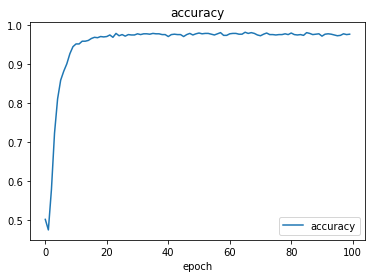

In [49]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

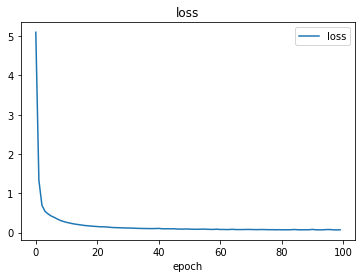

In [50]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [60]:
def plt_decision_boundry(X,y,model):
    x_span = np.linspace(min(X[:,0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:,1])-1,max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    prediction = model.predict(grid)
    z = prediction.reshape(xx.shape)
    plt.contourf(xx,yy,z)

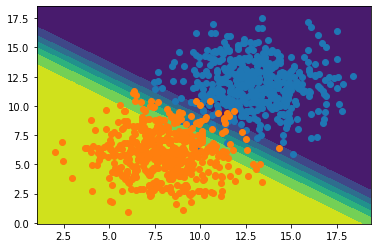

In [61]:
plt_decision_boundry(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

prediction is: [[0.9986313]]


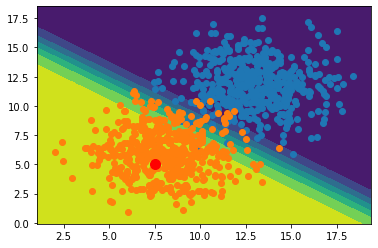

In [65]:
plt_decision_boundry(X,y,model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker="o",markersize=10,color="red")
print("prediction is:", prediction)